In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import sys
import os

# Add the directory containing the module to the system path
module_path = os.path.abspath(os.path.join('C:\\Users\\samue\\OneDrive\\AIML\\HS2024\\Data Sicence Projekt\\HSLU_DSPRO1_TrafficStatus\\data'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the module
import DataEngineeringLibrary as dlib

In [3]:
# Load the data form seperate dictionary, because the data is too big to load onto github
# Dataload restricted to 1 million rows, because of speed and memory issues
# Just for testing purposes
dataframeLondonUTD19 = dlib.loadData(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_UTD19.csv", nrows=1000000)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


In [4]:
# Drop the error column, because it is not needed
dataframeLondonUTD19 = dlib.preprocess_dataframe(dataframeLondonUTD19)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday


In [5]:
#Calculate the speed using the formula speed = flow / occupancy
dataframeLondonUTD19 = dlib.calculate_traffic_speed(dataframeLondonUTD19)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


In [6]:
dataframeLondonUTD19 = dlib.drop_outliers(dataframeLondonUTD19, column='traffic', group_by_detid=True)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,CNTR_N00/005x1,840.0,0.110000,london,Saturday,92.400000
1,2015-05-16,300,CNTR_N00/005x1,564.0,0.096667,london,Saturday,54.519992
2,2015-05-16,600,CNTR_N00/005x1,468.0,0.068333,london,Saturday,31.980000
3,2015-05-16,900,CNTR_N00/005x1,816.0,0.104167,london,Saturday,84.999999
4,2015-05-16,1200,CNTR_N00/005x1,864.0,0.110000,london,Saturday,95.040000


In [7]:
dataframeLondonUTD19Clean = dlib.dropFalseValues(dataframeLondonUTD19, column='traffic', outlier_factor=3)
dataframeLondonUTD19Clean.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,CNTR_N00/005x1,840.0,0.110000,london,Saturday,92.400000
1,2015-05-16,300,CNTR_N00/005x1,564.0,0.096667,london,Saturday,54.519992
2,2015-05-16,900,CNTR_N00/005x1,816.0,0.104167,london,Saturday,84.999999
3,2015-05-16,1200,CNTR_N00/005x1,864.0,0.110000,london,Saturday,95.040000
4,2015-05-16,1500,CNTR_N00/005x1,612.0,0.094167,london,Saturday,57.629991


In [8]:
# Get the number of unique 'detid' values in the DataFrame
num_unique_detid = dataframeLondonUTD19['detid'].unique()
print(num_unique_detid.size)

160


In [9]:
dataframeLondonUTD19, anomlies = dlib.detect_anomalies(dataframeLondonUTD19, column='traffic', minIQR=5, minDataPoints=5000)
print(anomlies.size)

Anomalies detected based on IQR: 2
Anomalies detected based on IQR too small: 25
Anomalies detected based on not enough data: 13
37


In [10]:
# Get the number of unique 'detid' values in the DataFrame
num_unique_detid = dataframeLondonUTD19['detid'].unique()
print(num_unique_detid.size)

123


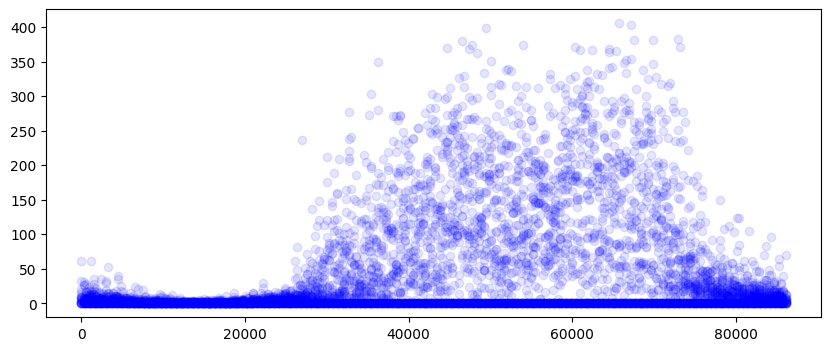

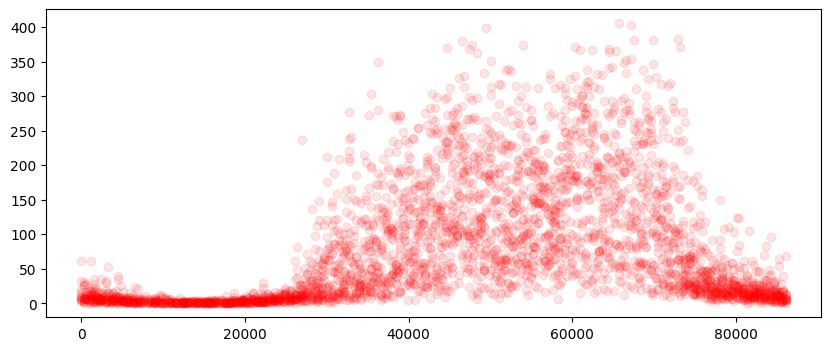

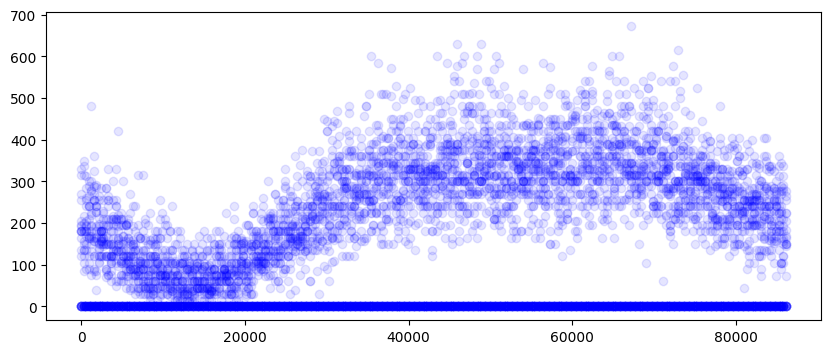

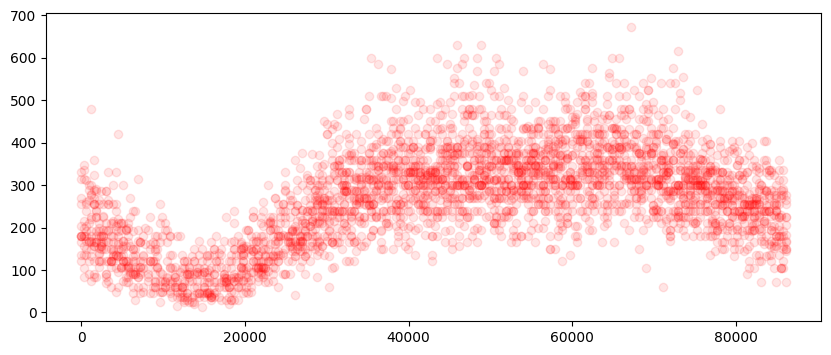

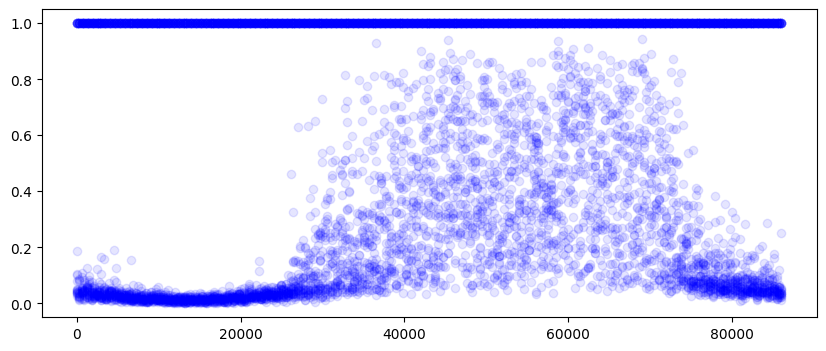

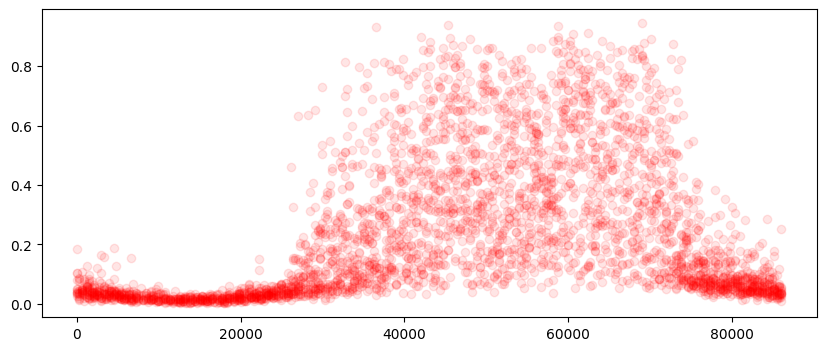

In [21]:
#Plot the speed, traffic and occ of a random detector
dataframeDetector = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == 'EAST_N17/121b1']
dataframeDetectorClean = dataframeLondonUTD19Clean[dataframeLondonUTD19Clean['detid'] == 'EAST_N17/121b1']
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetector['interval'], dataframeDetector['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetectorClean['interval'], dataframeDetectorClean['traffic'], alpha=0.1, color='red')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetector['interval'], dataframeDetector['flow'], alpha=0.1, color='blue')                                  
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetectorClean['interval'], dataframeDetectorClean['flow'], alpha=0.1, color='red')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetector['interval'], dataframeDetector['occ'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetectorClean['interval'], dataframeDetectorClean['occ'], alpha=0.1, color='red')
plt.show()

In [28]:
dataframeLondonUTD19= dataframeLondonUTD19Clean

In [34]:
# select a random detector
unique_detectors = dataframeLondonUTD19['detid'].unique()
random_detector = pd.Series(unique_detectors).sample(1).iloc[0]
dataframe_random_detector = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == random_detector]
print(f"Selected detector: {random_detector}")
dataframe_random_detector.head()

Selected detector: CNTR_N01/009h1


,day,interval,detid,flow,occ,city,weekday,traffic
25441,2015-05-16,0,CNTR_N01/009h1,336.0,0.191667,london,Saturday,64.400006
25442,2015-05-16,300,CNTR_N01/009h1,288.0,0.130833,london,Saturday,37.680000
25443,2015-05-16,900,CNTR_N01/009h1,444.0,0.131667,london,Saturday,58.460006
25444,2015-05-16,1200,CNTR_N01/009h1,288.0,0.175000,london,Saturday,50.400002
25445,2015-05-16,1500,CNTR_N01/009h1,384.0,0.180833,london,Saturday,69.440003


Special random detectors 
- EAST_N17/121b1
- CNTR_N01/067k1

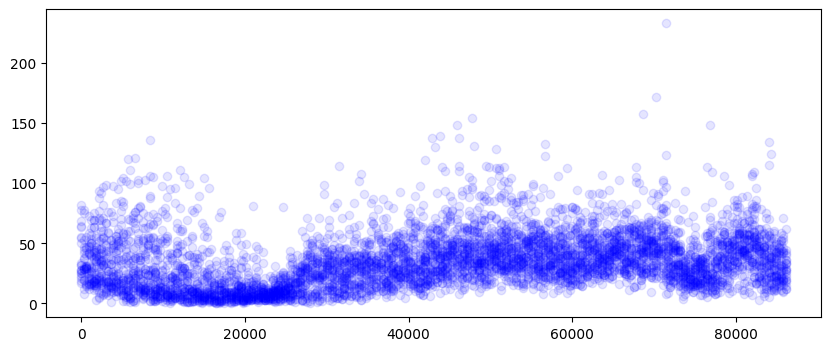

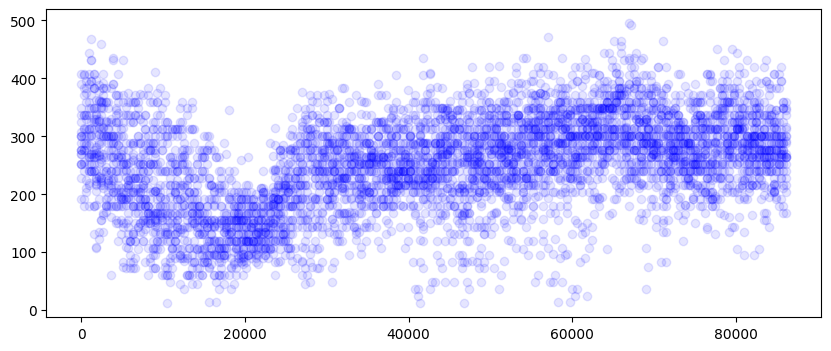

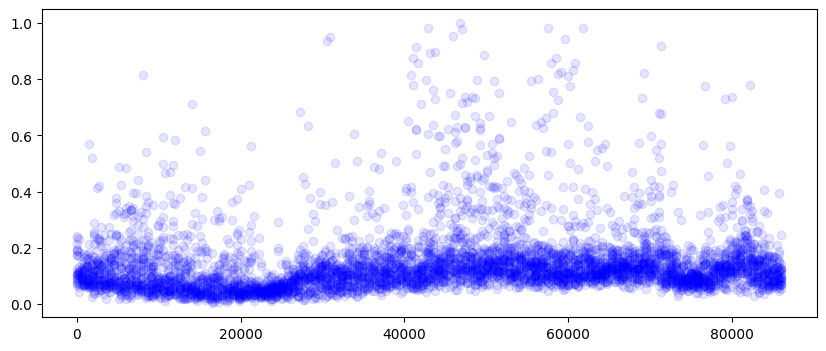

In [35]:
#Plot the speed, traffic and occ of a random detector
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['flow'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['occ'], alpha=0.1, color='blue')
plt.show()

In [36]:
# Select a random day
unique_days = dataframe_random_detector['weekday'].unique()
random_day = pd.Series(unique_days).sample(1).iloc[0]
dataframe_random_day = dataframe_random_detector[dataframe_random_detector['weekday'] == random_day]
print(f"Selected day: {random_day}")
dataframe_random_day.head()

Selected day: Friday


,day,interval,detid,flow,occ,city,weekday,traffic
25674,2015-05-15,0,CNTR_N01/009h1,276.0,0.196667,london,Friday,54.280004
25675,2015-05-15,600,CNTR_N01/009h1,336.0,0.087500,london,Friday,29.400003
25676,2015-05-15,900,CNTR_N01/009h1,336.0,0.151667,london,Friday,50.959998
25677,2015-05-15,1200,CNTR_N01/009h1,396.0,0.102500,london,Friday,40.590002
25678,2015-05-15,1500,CNTR_N01/009h1,348.0,0.126667,london,Friday,44.079998


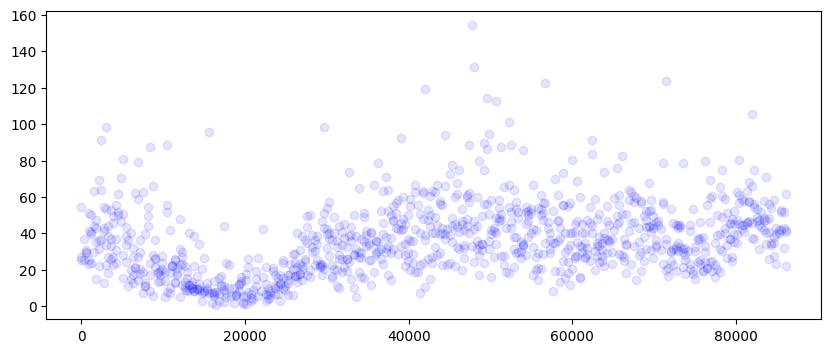

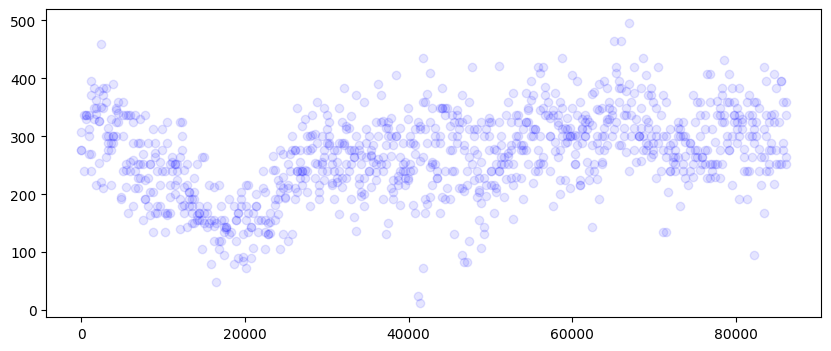

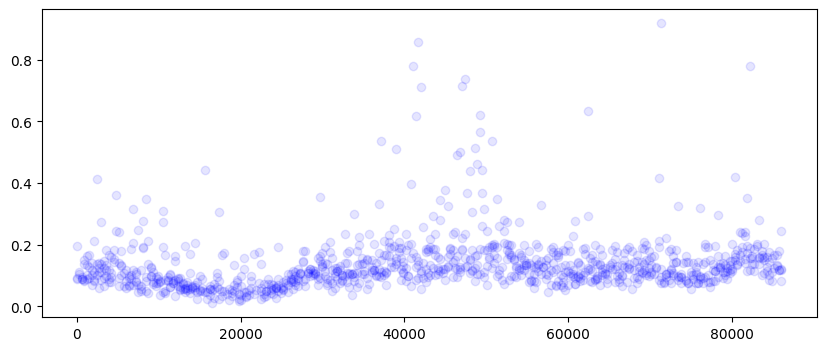

In [37]:
#Plot the speed, traffic an occ of a random detector on a random day
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['flow'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['occ'], alpha=0.1, color='blue')
plt.show()